# Projet Ouverture à la Recherche
Enseignant : KHEDDOUCI Hamamache

Doctorante : Amira Ben Hadid

Année 2022-2023


*   VINCENT Yann p1906701
*   LARIBI Iliesse p1911241 
    
# Transformation de devis client à l'aide du Machine Learning

In [1]:
# Importation de la bibliothèque NumPy avec l'alias 'np'
import numpy as np
# Configuration des options d'affichage des tableaux NumPy
# Seules les 10 000 premières et dernières valeurs seront affichées, et l'affichage en format exponentiel est désactivé.
np.set_printoptions(threshold=10000, suppress=True)
# Importation de la bibliothèque Pandas avec l'alias 'pd'
import pandas as pd
# Importation de la bibliothèque Warnings pour désactiver les avertissements
import warnings
# Désactivation des avertissements pour éviter l'affichage de messages non pertinents
warnings.filterwarnings('ignore')
# Importation de la bibliothèque Matplotlib avec l'alias 'plt'
import matplotlib.pyplot as plt

In [2]:
# Importation de la fonction confusion_matrix de la bibliothèque sklearn.metrics
from sklearn.metrics import confusion_matrix
# Définition d'une fonction nommée 'mat' prenant en entrée les prédictions 'y_pred' et les valeurs réelles 'y_test'
def mat(y_test, y_pred):
    # Création de la matrice de confusion à partir des prédictions 'y_pred' et des valeurs réelles 'y_test'
    matrice = confusion_matrix(y_test, y_pred)
    # Récupération des valeurs de la matrice de confusion pour chaque catégorie (True negative, False positive, False negative, True positive)
    Tneg = matrice[0][0]
    Fpos = matrice[0][1]
    Fneg = matrice[1][0]
    Tpos = matrice[1][1]
    # Affichage des valeurs de la matrice de confusion sous forme de texte pour chaque catégorie
    print("Vrai negatif :  Non prédit |  Devis non payé  ||   Bien      ")
    print(Tneg)
    print("")
    print("Faux positif :  Prédit     |  Devis non payé  ||   Pas bien  ")
    print(Fpos)
    print("")
    print("Faux negatif :  Non prédit |  Devis payé      ||   Pas bien  ")
    print(Fneg)
    print("")
    print("Vrai positif :  Prédit     |  Devis payé      ||   Bien      ")
    print(Tpos)
    print("")

    
from sklearn.metrics import recall_score #importation de la fonction de calcul de rappel
from sklearn.metrics import precision_score #importation de la fonction de calcul de précision
from sklearn.metrics import accuracy_score #importation de la fonction de calcul de l'accuracy
def score(x_train, y_train, y_pred,y_test,algoname,algo): #définition de la fonction score qui prend 6 paramètres
    nb = 10 #nombre de fold pour la cross validation
    precision = precision_score(y_test, y_pred) #calcul de la précision à partir de y_test et y_pred
    rappel = recall_score(y_test, y_pred) #calcul du rappel à partir de y_test et y_pred
    accuracy = accuracy_score(y_test, y_pred) #calcul de l'accuracy à partir de y_test et y_pred
    cros_val_score = cross_val(algo, x_train, y_train, nb) #calcul du cross validation score à partir de l'algorithme, les données d'entrainement et le nombre de fold
    print("---------------------SCORE DE {0}----------------".format(algoname)) #affichage d'un titre
    print("")
    print("Score de precision du {0} : ".format(algoname)) #affichage de la précision
    print(precision)
    print("")
    print("Score de rappel du {0} : ".format(algoname)) #affichage du rappel
    print(rappel)
    print("")
    print("Score d'accuracy du {0} : ".format(algoname)) #affichage de l'accuracy
    print(accuracy)
    print("")
    print("Cross val score du {0} sur {1} model : ".format(algoname,nb)) #affichage du cross validation score
    print(cros_val_score)
    print("")
    print("")
    print("")
    mat(y_test, y_pred) #appel à la fonction mat pour afficher la matrice de confusion

    

In [3]:
from sklearn.tree import DecisionTreeClassifier # importation du modèle DecisionTreeClassifier
def cart(x_train, y_train, x_test, y_test):
    modelcart = DecisionTreeClassifier(random_state = 1) # initialisation d'un modèle DecisionTreeClassifier avec une graine aléatoire
    modelcart.fit(x_train, y_train) # entraînement du modèle sur les données d'entraînement
    y_pred = modelcart.predict(x_test) # prédiction des labels pour les données de test
    score(x_train, y_train, y_pred,y_test,"cart",modelcart) # calcul et affichage des métriques de performance

from sklearn.ensemble import RandomForestClassifier # importation du modèle RandomForestClassifier
def forest(x_train, y_train, x_test, y_test):
    forest = RandomForestClassifier(n_estimators=100) # initialisation d'un modèle RandomForestClassifier avec 100 arbres
    forest.fit(x_train, y_train) # entraînement du modèle sur les données d'entraînement
    y_pred = forest.predict(x_test) # prédiction des labels pour les données de test
    score(x_train, y_train, y_pred,y_test,"forest",forest) # calcul et affichage des métriques de performance

from sklearn.ensemble import GradientBoostingClassifier # importation du modèle GradientBoostingClassifier
def gradientB(x_train, y_train, x_test, y_test):
    GradientB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0) # initialisation d'un modèle GradientBoostingClassifier avec 100 arbres, un taux d'apprentissage de 1.0, une profondeur maximale de 1 et une graine aléatoire
    GradientB.fit(x_train, y_train) # entraînement du modèle sur les données d'entraînement
    y_pred = GradientB.predict(x_test) # prédiction des labels pour les données de test
    score(x_train, y_train,y_pred,y_test,"gradientB",GradientB) # calcul et affichage des métriques de performance
    
from sklearn import svm

# fonction pour entraîner un SVM multiclasse
def svcm(x_train, y_train, x_test, y_test):
    Svcm = svm.SVC(decision_function_shape='ovo') # créer un objet SVM avec une fonction de décision 'ovo' (one-vs-one)
    Svcm.fit(x_train, y_train) # entraîner le SVM sur les données d'entraînement
    y_pred = Svcm.predict(x_test) # prédire les labels de la classe de test
    score(x_train, y_train, y_pred,y_test,"svcm",Svcm) # évaluer la performance de l'algorithme avec la fonction score

from sklearn.neural_network import MLPClassifier

# fonction pour entraîner un MLP
def mlper(x_train, y_train, x_test, y_test):
    mlp = MLPClassifier(hidden_layer_sizes=(40,20), random_state=1) # créer un objet MLP avec 2 couches cachées de 40 et 20 neurones
    mlp.fit(x_train, y_train) # entraîner le MLP sur les données d'entraînement
    y_pred = mlp.predict(x_test) # prédire les labels de la classe de test
    score(x_train, y_train, y_pred,y_test,"mlper",mlp) # évaluer la performance de l'algorithme avec la fonction score

from sklearn.neighbors import KNeighborsClassifier

# fonction pour entraîner un KNN à 5 voisins
def KNN5(x_train, y_train, x_test, y_test):
    modelneigh = KNeighborsClassifier(n_neighbors=5) # créer un objet KNN avec 5 voisins
    modelneigh.fit(x_train, y_train) # entraîner le KNN sur les données d'entraînement
    y_pred = modelneigh.predict(x_test) # prédire les labels de la classe de test
    score(x_train, y_train, y_pred,y_test,"KNN5",modelneigh) # évaluer la performance de l'algorithme avec la fonction score
    
from sklearn.neighbors import KNeighborsClassifier

# Définition d'une fonction pour un modèle KNN avec 10 voisins
def KNN10(x_train, y_train, x_test, y_test):
    # Création d'un objet KNeighborsClassifier avec 10 voisins
    modelneigh = KNeighborsClassifier(n_neighbors=10)
    # Entraînement du modèle sur les données d'entraînement
    modelneigh.fit(x_train, y_train)
    # Prédiction des étiquettes de classe pour les données de test
    y_pred = modelneigh.predict(x_test)
    # Calcul et affichage du score
    score(x_train, y_train, y_pred,y_test,"KNN10",modelneigh)

# Définition d'une fonction pour un modèle KNN avec 100 voisins
from sklearn.neighbors import KNeighborsClassifier
def KNN100(x_train, y_train, x_test, y_test):
    # Création d'un objet KNeighborsClassifier avec 100 voisins
    modelneigh = KNeighborsClassifier(n_neighbors=100)
    # Entraînement du modèle sur les données d'entraînement
    modelneigh.fit(x_train, y_train)
    # Prédiction des étiquettes de classe pour les données de test
    y_pred = modelneigh.predict(x_test)
    # Calcul et affichage du score
    score(x_train, y_train, y_pred,y_test,"KNN100",modelneigh)


In [4]:
from sklearn.model_selection import cross_validate
# La fonction prend en entrée un modèle "algo", des données d'entrainement x_train et y_train, et un nombre de splits "nb"
def cross_val(algo, x_train, y_train, nb):
    # On utilise la fonction "cross_validate" de sklearn pour effectuer la validation croisée en utilisant le modèle "algo", les données d'entrainement x_train et y_train, et le nombre de splits "nb"
    cv_results = cross_validate(algo, x_train, y_train, cv=nb)
    # On retourne la moyenne des scores de test obtenus lors de la validation croisée
    return cv_results['test_score'].mean()


In [5]:
# Lecture du fichier CSV 'final_data.csv' à l'aide de la fonction read_csv() de pandas
# Le paramètre encoding="ISO-8859-1" spécifie l'encodage des caractères utilisé dans le fichier CSV
data = pd.read_csv('./final_data.csv', sep=';', encoding="ISO-8859-1")
# Affichage de la variable 'data'
data

,work_id,person_id,is_pro,work_created_at,zip,acquisition_id,work_type_id,volume,work_creator,handling,...,group,plant_id,production_price,transport_price,handling_price,discount_price,total_price,previous_bill_count,client_maturity,priority
0,e86edc0a-5e1b-4e4b-8fdb-497f2596fe6b,0000f5dd-3a7d-46fe-adea-3fd3739ab1ef,0.0,20/08/2021 10:03,95310.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,Conseillers,1.0,...,1.0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,344.80,78.10,549.30,-54.0,1026.20,0.0,90D,4.0
1,95c3066e-ff07-4d77-8a8a-5c4be7e6f086,0001ce75-d1ee-4975-a034-39eee6673d7e,0.0,10/10/2021 21:28,17190.0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,Clients,1.0,...,1.0,5e101746-6975-446c-93c2-b363e9421ce4,1633.77,447.12,634.04,0.0,2714.93,0.0,30D,8.0
2,ad3cf5c2-5b45-498e-8f40-33f5ab2c8450,00023146-c4fb-49f5-a14a-a26af1c32851,0.0,09/08/2021 09:32,18220.0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,Conseillers,0.0,...,1.0,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,696.27,168.31,0.00,0.0,864.58,0.0,30D,6.0
3,ba4545c2-2d4b-410b-b3b4-5870bc26da28,000375b8-9d09-4a7a-82e4-cd4058a0fb16,0.0,09/02/2022 18:31,78740.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,Clients,0.0,...,1.0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,503.86,177.87,0.00,0.0,681.73,0.0,15D,3.0
4,6c6b3eb6-3369-49f0-bf93-1c7148de12aa,0003d06c-c42d-4e1a-9bd2-2384a9e65668,0.0,22/09/2021 08:08,45290.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,Conseillers,0.0,...,1.0,c15debea-1674-4f7f-9ffa-7a3510434e02,855.50,205.80,0.00,100.0,961.30,0.0,48H,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55112,0af86c4a-e9be-4219-96bb-fbf972ff7a5e,fffa25fd-a267-47f2-897f-2e1c7d75fa8c,0.0,27/02/2022 11:53,76230.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,Clients,1.0,...,1.0,9f112b10-6c24-4aca-9c01-dfaa59664b48,598.37,204.70,190.96,0.0,994.03,0.0,48H,3.0
55113,64c62496-0c69-426f-be3e-c8524f67d15a,fffad6b0-33e0-4484-a767-e15d68bb5802,0.0,06/09/2022 14:29,66690.0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,Clients,0.0,...,1.0,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,676.47,193.91,0.00,0.0,870.38,0.0,30D,9.0
55114,861c8e37-5ed4-4701-a1c0-480a8dcd1deb,fffd3655-ff00-4187-b82a-4ac770419cb6,0.0,05/06/2022 11:54,72220.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,Clients,0.0,...,1.0,57f96607-5fd7-436f-97bf-39dda209fe00,555.93,191.40,0.00,0.0,747.33,0.0,90D,6.0
55115,91938b7c-351e-4e35-b032-19bc98a8fd1b,fffea4d9-8603-43a0-b69d-29a369793fcb,0.0,11/10/2022 13:58,29880.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,Conseillers,0.0,...,1.0,777f596a-fe66-4593-8ac5-65c45b1f9eda,976.04,0.00,0.00,0.0,976.04,0.0,30D,7.0


In [6]:
# Supprimer les lignes contenant des valeurs manquantes pour certaines colonnes spécifiques
data = data.dropna(subset=['is_pro', 'zip', 'volume','handling','group','discount_price','previous_bill_count'])
# Extraire les données en tant que tableau NumPy
X = data.values
# Sélectionner les colonnes numériques pour l'analyse
X_num = X[:, [2,4,7,9,16,21,23]]
# Sélectionner les colonnes catégorielles pour l'analyse
X_cat = X[:, [5,6,17,24]]
# Extraire les labels de classification (si l'achat a été finalisé ou non)
y = data['is_finished']

In [7]:
from sklearn.preprocessing import OneHotEncoder  # importer la classe OneHotEncoder de sklearn.preprocessing

X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()  # encoder les variables catégorielles X_cat en utilisant la méthode OneHotEncoder, et convertir le résultat en un tableau numpy
X = np.hstack((X_cat_bin, X_num))  # joindre les tableaux numériques X_num et catégoriels X_cat_bin en utilisant la fonction hstack() de numpy et enregistrer le résultat dans X


In [8]:
# Affichage du nombre de valeurs pour chaque classe
y.value_counts()

0.0    49714
1.0     5366
Name: is_finished, dtype: int64

<Axes: ylabel='is_finished'>

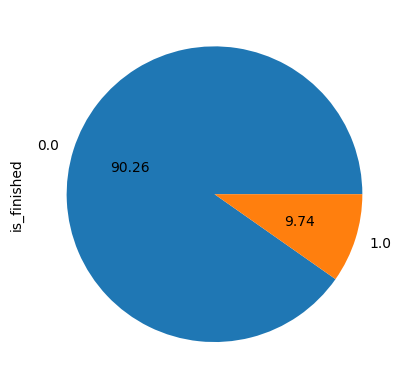

In [9]:
# Affichage des proportions des valeurs uniques de la variable cible
y.value_counts().plot.pie(autopct='%.2f')

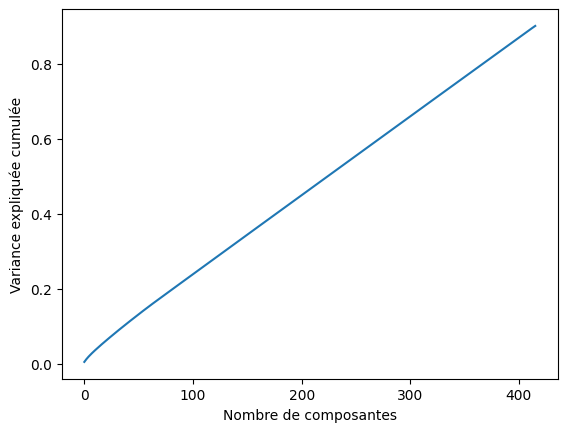

In [10]:
# Import des bibliothèques
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instanciation de l'objet StandardScaler
scaler = StandardScaler()

# Séparation des données en jeu d'entraînement et de test
X1, X2, Y1, Y2 = train_test_split(X, y, train_size = 0.8, random_state = 1)

# Standardisation des données d'entraînement et de test
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.transform(X2)

# Instanciation de l'objet PCA avec 90% de la variance expliquée
pca_test = PCA(n_components=0.9)

# Application de la PCA sur les données d'entraînement et de test
PCA_X1 = pca_test.fit_transform(X1_scaled)
PCA_X2 = pca_test.transform(X2_scaled)

# Concaténation des données PCA avec les données mises à l'échelle
PCA_X1_scaled = np.hstack((PCA_X1, X1_scaled))
PCA_X2_scaled = np.hstack((PCA_X2, X2_scaled))

# Visualisation du pourcentage cumulatif de la variance expliquée par rapport au nombre de composantes
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()

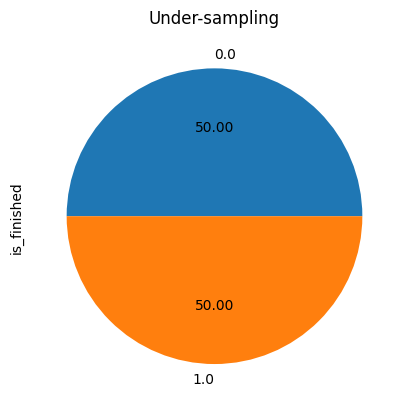

In [11]:
from imblearn.under_sampling import RandomUnderSampler
# Création de l'objet RandomUnderSampler avec une stratégie de sous-échantillonnage équilibrée
rus = RandomUnderSampler(sampling_strategy=1)
# sous-échantillonnage de l'ensemble de données X1 et Y1 avec le RandomUnderSampler
# Les nouvelles données sont stockées dans X_res et y_res
X_res, y_res = rus.fit_resample(X1, Y1)
# sous-échantillonnage des données d'entraînement mises à l'échelle avec le RandomUnderSampler
# Les nouvelles données sont stockées dans X_res_scaled et y_res_scaled
X_res_scaled, y_res_scaled = rus.fit_resample(X1_scaled, Y1)
# sous-échantillonnage des données d'entraînement PCA-mises à l'échelle avec le RandomUnderSampler
# Les nouvelles données sont stockées dans X_res_PCA_scaled et y_res_PCA_scaled
X_res_PCA_scaled, y_res_PCA_scaled = rus.fit_resample(PCA_X1_scaled, Y1)
# Création d'un graphique circulaire montrant la distribution des classes après le sous-échantillonnage
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")


In [12]:
# Affichage des résultats des modèles sur les trois ensembles de données (non normalisées, normalisées et transformées par PCA)
print("--------------------------UNDER-SAMPLING--------------------------------")
print("")
print("---------Données Brutes---------")
print("")
cart(X_res, y_res, X2, Y2)
forest(X_res, y_res, X2, Y2)
gradientB(X_res, y_res, X2, Y2)
mlper(X_res, y_res, X2, Y2)
KNN5(X_res, y_res, X2, Y2)
KNN10(X_res, y_res, X2, Y2)
KNN100(X_res, y_res, X2, Y2)
print("")
print("")


print("")
print("---------Données standardisées : Scaled---------")
print("")
cart(X_res_scaled, y_res_scaled, X2_scaled, Y2)
forest(X_res_scaled, y_res_scaled, X2_scaled, Y2)
gradientB(X_res_scaled, y_res_scaled, X2_scaled, Y2)
mlper(X_res_scaled, y_res_scaled, X2_scaled, Y2)
KNN5(X_res_scaled, y_res_scaled, X2_scaled, Y2)
KNN10(X_res_scaled, y_res_scaled, X2_scaled, Y2)
KNN100(X_res_scaled, y_res_scaled, X2_scaled, Y2)
print("")
print("")

print("")
print("---------PCA---------")
print("")
cart(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
forest(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
gradientB(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
mlper(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
KNN5(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
KNN10(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
KNN100(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
print("")
print("")


--------------------------UNDER-SAMPLING--------------------------------

---------Données Brutes---------

---------------------SCORE DE cart----------------

Score de precision du cart : 
0.17098445595854922

Score de rappel du cart : 
0.656872037914692

Score d'accuracy du cart : 
0.6621278140885984

Cross val score du cart sur 10 model : 
0.6590096060523776



Vrai negatif :  Non prédit |  Devis non payé  ||   Bien      
6601

Faux positif :  Prédit     |  Devis non payé  ||   Pas bien  
3360

Faux negatif :  Non prédit |  Devis payé      ||   Pas bien  
362

Vrai positif :  Prédit     |  Devis payé      ||   Bien      
693

---------------------SCORE DE forest----------------

Score de precision du forest : 
0.2085590465872156

Score de rappel du forest : 
0.7298578199052133

Score d'accuracy du forest : 
0.7088779956427015

Cross val score du forest sur 10 model : 
0.7157244329256653



Vrai negatif :  Non prédit |  Devis non payé  ||   Bien      
7039

Faux positif :  Prédit    

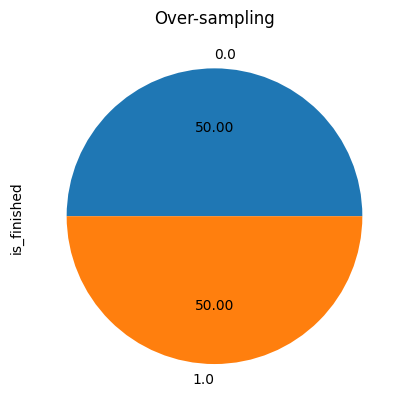

In [12]:
from imblearn.over_sampling import RandomOverSampler

# Création d'un objet RandomOverSampler avec un ratio d'échantillonnage égal à 1
ros = RandomOverSampler(sampling_strategy=1)

# Rééchantillonnage de l'ensemble de données X1 et Y1 avec le RandomOverSampler
# Les nouvelles données sont stockées dans X_res et y_res
X_res, y_res = ros.fit_resample(X1, Y1)

# Rééchantillonnage des données d'entraînement mises à l'échelle avec le RandomOverSampler
# Les nouvelles données sont stockées dans X_res_scaled et y_res_scaled
X_res_scaled, y_res_scaled = ros.fit_resample(X1_scaled, Y1)

# Rééchantillonnage des données d'entraînement PCA-mises à l'échelle avec le RandomOverSampler
# Les nouvelles données sont stockées dans X_res_PCA_scaled et y_res_PCA_scaled
X_res_PCA_scaled, y_res_PCA_scaled = ros.fit_resample(PCA_X1_scaled, Y1)

# Création d'un graphique circulaire montrant la distribution des classes après le rééchantillonnage
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")


In [14]:
# Affichage des résultats des modèles sur les trois ensembles de données (non normalisées, normalisées et transformées par PCA)
print("--------------------------OVER-SAMPLING--------------------------------")
print("")
print("---------Données Brutes---------")
print("")
cart(X_res, y_res, X2, Y2)
forest(X_res, y_res, X2, Y2)
gradientB(X_res, y_res, X2, Y2)
mlper(X_res, y_res, X2, Y2)
KNN5(X_res, y_res, X2, Y2)
KNN10(X_res, y_res, X2, Y2)
KNN100(X_res, y_res, X2, Y2)
print("")
print("")


print("")
print("---------Données standardisées : Scaled---------")
print("")
cart(X_res_scaled, y_res_scaled, X2_scaled, Y2)
forest(X_res_scaled, y_res_scaled, X2_scaled, Y2)
gradientB(X_res_scaled, y_res_scaled, X2_scaled, Y2)
mlper(X_res_scaled, y_res_scaled, X2_scaled, Y2)
KNN5(X_res_scaled, y_res_scaled, X2_scaled, Y2)
KNN10(X_res_scaled, y_res_scaled, X2_scaled, Y2)
KNN100(X_res_scaled, y_res_scaled, X2_scaled, Y2)
print("")
print("")

print("")
print("---------PCA---------")
print("")
cart(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
forest(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
gradientB(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
mlper(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
KNN5(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
KNN10(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
KNN100(X_res_PCA_scaled, y_res_PCA_scaled, PCA_X2_scaled, Y2)
print("")
print("")


--------------------------OVER-SAMPLING--------------------------------

---------Données Brutes---------

---------------------SCORE DE cart----------------

Score de precision du cart : 
0.24129930394431554

Score de rappel du cart : 
0.2957345971563981

Score d'accuracy du cart : 
0.8435003631082062

Cross val score du cart sur 10 model : 
0.9471486803210546



Vrai negatif :  Non prédit |  Devis non payé  ||   Bien      
8980

Faux positif :  Prédit     |  Devis non payé  ||   Pas bien  
981

Faux negatif :  Non prédit |  Devis payé      ||   Pas bien  
743

Vrai positif :  Prédit     |  Devis payé      ||   Bien      
312

---------------------SCORE DE forest----------------

Score de precision du forest : 
0.35325365205843295

Score de rappel du forest : 
0.25213270142180094

Score d'accuracy du forest : 
0.884168482207698

Cross val score du forest sur 10 model : 
0.9734863254414421



Vrai negatif :  Non prédit |  Devis non payé  ||   Bien      
9474

Faux positif :  Prédit    

---------------------SCORE DE forest----------------

Score de precision du forest : 
0.2631578947368421

Score de rappel du forest : 
0.1990521327014218

Score d'accuracy du forest : 
0.8699164851125636

Cross val score du forest sur 10 model : 
0.9698513157239033



Vrai negatif :  Non prédit |  Devis non payé  ||   Bien      
9373

Faux positif :  Prédit     |  Devis non payé  ||   Pas bien  
588

Faux negatif :  Non prédit |  Devis payé      ||   Pas bien  
845

Vrai positif :  Prédit     |  Devis payé      ||   Bien      
210

---------------------SCORE DE gradientB----------------

Score de precision du gradientB : 
0.22435105067985167

Score de rappel du gradientB : 
0.6881516587677725

Score d'accuracy du gradientB : 
0.7422839506172839

Cross val score du gradientB sur 10 model : 
0.743830833351131



Vrai negatif :  Non prédit |  Devis non payé  ||   Bien      
7451

Faux positif :  Prédit     |  Devis non payé  ||   Pas bien  
2510

Faux negatif :  Non prédit |  Devis payé  

# Résultats 
Ces valeurs sont un mix de nos résultats sur ce même code. La difference s'explique avec une part d'aleatoire lors du split et lors de l'over et under sampling. Il est donc normal que certaines valeurs ne soient pas exactement les memes que celles trouvées dans l'algorithme mais cela n'impacte pas les analyses poussées de comparaison. Si vous executez vous meme le code vous aurez aussi des resultats legerements differents.

## Under-Sampling

### Données brutes

|           | Précision | Rappel | Accuracy | Cross-Validation |
|:---------:|:---------:|:------:|:--------:|:----------------:|
| Cart      | 0.162     | 0.640  | 0.648    | 0.662            |
| Forest    | 0.205     |**0.711**| 0.709   | 0.710            |
| GradientB | 0.217     | 0.684  | 0.734    |**0.719**         |
| Mlper     |**0.480**  | 0.035  |**0.903** | 0.506            |
| KNN5      | 0.144     | 0.590  | 0.624    | 0.599            |
| KNN10     | 0.161     | 0.513  | 0.698    | 0.610            |
| KNN100    | 0.158     | 0.524  | 0.688    | 0.613            |

Meilleur score :
* Précision : Mlper **0.480**
* Rappel :  Forest **0.711**
* Accuracy : Mlper **0.903**
* Cross-Validation : GradientB **0.719**

Ici les 2 meilleurs algorithmes sont Forest et GradientB en moyenne.

### Données standardisées : Scaled

|           | Précision | Rappel | Accuracy | Cross-Validation |
|:---------:|:---------:|:------:|:--------:|:----------------:|
| Cart      | 0.167     | 0.612  | 0.671    | 0.659            |
| Forest    | 0.209     | 0.710 | 0.715   | 0.711            |
| GradientB |**0.221**  | 0.698  |**0.736** |**0.722**         |
| Mlper     | 0.172     | 0.653  | 0.665    | 0.650            |
| KNN5      | 0.156     | 0.658  | 0.627    | 0.638            |
| KNN10     | 0.173     | 0.588  | 0.691    | 0.635            |
| KNN100    | 0.100     |**0.958**| 0.178    | 0.518            |

Meilleur score :
* Précision : GradientB **0.221**
* Rappel :  KNN100 **0.958**
* Accuracy : GradientB **0.736**
* Cross-Validation : GradientB **0.722**

Ici les 2 meilleurs algorithmes sont Forest et GradientB en moyenne.

### PCA

|           | Précision | Rappel | Accuracy | Cross-Validation |
|:---------:|:---------:|:------:|:--------:|:----------------:|
| Cart      | 0.152     | 0.629  | 0.629    | 0.631            |
| Forest    | 0.187     | 0.665  | 0.690    | 0.682            |
| GradientB |**0.208**  | 0.685 |**0.720**  |**0.707**         |
| Mlper     | 0.176     | 0.669  | 0.669    | 0.673            |
| KNN5      | 0.155     | 0.659  | 0.625    | 0.643            |
| KNN10     | 0.173     | 0.610  | 0.683    | 0.642            |
| KNN100    | 0.097     |**0.918**| 0.180   | 0.512            |

Meilleur score :
* Précision : GradientB **0.208**
* Rappel :  KNN100 **0.918**
* Accuracy : GradientB **0.720**
* Cross-Validation : GradientB **0.707**

Ici les 2 meilleurs algorithmes sont Forest et GradientB en moyenne.

### Résultats de l'under-sampling : 

Meilleur score de l'under-sampling :
* Précision : Mlper **0.480** en données brutes
* Rappel :  KNN100 **0.958** en scaled
* Accuracy : Mlper **0.903** en données brutes
* Cross-Validation :  GradientB **0.722** en scaled

En réalité les meilleurs scores de rappel et d'accuracy ne sont pas vraiment représentatifs, dans la matrice de confusion on remarque que les predicitons de ces aglorithmes ne sont pas bonnes.  
En réalité les 2 meilleurs algorithmes apres analyse sont Forest et GradientB avec les données standardisées.  
On remarque un meilleur score de rappel pour le forest dans ce cas (score qui nous parrait etre le plus pertinent dans le cadre de ce projet). Mais sur les 3 autres scores le GradiantB est supérieur.




## Over-Sampling

### Données brutes

|           | Précision | Rappel | Accuracy | Cross-Validation |
|:---------:|:---------:|:------:|:--------:|:----------------:|
| Cart      | 0.241     | 0.295  | 0.843    | 0.947            |
| Forest    |**0.353**  | 0.252  |**0.884** |**0.973**         |
| GradientB | 0.225     |**0.697**| 0.741   | 0.734            |
| Mlper     | 0.260     | 0.572  | 0.803    | 0.659            |
| KNN5      | 0.179     | 0.441  | 0.753    | 0.878            |
| KNN10     | 0.166     | 0.547  | 0.694    | 0.809            |
| KNN100    | 0.158     | 0.586  | 0.662    | 0.665            |

Meilleur score :
* Précision : Forest **0.353**
* Rappel :  GradientB **0.697**
* Accuracy : Forest **0.884**
* Cross-Validation : Forest **0.973**

Ici les 3 meilleurs algorithmes sont Forest, Mlper et GradientB en moyenne.

### Données standardisées : Scaled

|           | Précision | Rappel | Accuracy | Cross-Validation |
|:---------:|:---------:|:------:|:--------:|:----------------:|
| Cart      | 0.240     | 0.292  | 0.843    | 0.948            |
| Forest    |**0.349**  | 0.243  |**0.884** |**0.973**         |
| GradientB | 0.223     |**0.690**| 0.740   | 0.735            |
| Mlper     | 0.235     | 0.400  | 0.817    | 0.915            |
| KNN5      | 0.190     | 0.472  | 0.757    | 0.883            |
| KNN10     | 0.169     | 0.559  | 0.694    | 0.817            |
| KNN100    | 0.169     | 0.647  | 0.661    | 0.684            |

Meilleur score :
* Précision : Forest **0.349**
* Rappel :  GradientB **0.690**
* Accuracy : Forest **0.884**
* Cross-Validation : Forest **0.973**

Ici le meilleur algorithme est GradientB en moyenne.

### PCA

|           | Précision | Rappel | Accuracy | Cross-Validation |
|:---------:|:---------:|:------:|:--------:|:----------------:|
| Cart      | 0.229     | 0.236  | 0.850    | 0.955            |
| Forest    |**0.263**  | 0.199  |**0.869** |**0.969**         |
| GradientB | 0.224     |**0.688**| 0.742   | 0.743            |
| Mlper     | 0.227     | 0.371  | 0.818    | 0.915            |
| KNN5      | 0.190     | 0.469  | 0.758    | 0.884            |
| KNN10     | 0.167     | 0.555  | 0.693    | 0.819            |
| KNN100    | 0.171     | 0.646  | 0.665    | 0.685            |

Meilleur score :
* Précision : Forest **0.263**
* Rappel :  GradientB **0.688**
* Accuracy : Forest **0.869**
* Cross-Validation : Forest **0.969**

Ici les 3 meilleurs algorithmes sont cart, Forest, Mlper et GradientB en moyenne.

### Résultats de l'over-sampling : 

Meilleur score de l'over-sampling :
* Précision : Forest **0.353** en données brutes
* Rappel :  GradientB **0.697** en données brutes
* Accuracy : Forest **0.884** en données brutes et en scaled
* Cross-Validation :  Forest **0.973** en données brutes et en scaled

On remarque ici que les 2 meilleurs algorithmes en terme de meilleurs scores sont forest et GradientB.  
Le meilleur algorithme dans sa globalité est GradientB en moyenne qui en terme de score de rappel (score le plus pertinent dans notre cas) est largement au dessus des autres sur tous les scores. On retiendra le GradiantB en données brutes comme l'algorithme avec les resultalts les plus satisfaisants avec l'over-sampling.

# Conclusion
Avec ces 2 methodes de sampling on remarque des meilleurs scores de rappel moyen avec l'under sampling, le reste etant equilibré sauf pour le cross validation qui est largement superieur en moyenne sur l'over-sampling.  
Si on compare les 3 algorithmes qui resortent lors de tous ces tests on a :

|                                        | Précision | Rappel | Accuracy | Cross-Validation |
|:--------------------------------------:|:---------:|:------:|:--------:|:----------------:|
| Under-sampling Forest Scaled           | 0.209     | 0.710  | 0.715    | 0.711            |
| Under-sampling GradientB Scaled        | 0.221     | 0.698  | 0.736    | 0.722            |
| Over-sampling GradientB données brutes | 0.225     | 0.697  | 0.741    | 0.734            |  

On remarque ici que les 2 meilleurs algorithmes sont le forest en under-sampling sur données scaled avec le meilleur score de rappel et le GradiantB en over-sampling sur données brutes avec les meilleurs scores de precision, accuracy et cross-validation.  
Pour pousser les recherches plus loin il faudrait se baser sur ces 2 algorithmes dans leurs meilleures configurations de données comme precisé au-dessus.



